# 지도 시각화

In [1]:
import pandas as pd
import numpy as np
from glob import glob
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd

### geopandas 가서 다운받고 설치하기 

In [2]:
# 한글 폰트 깨짐 방지
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

# 마이너스 부호 깨짐 현상 방지
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

In [3]:
# warning 무시
import warnings
warnings.filterwarnings(action='ignore')

In [4]:
!python --version

Python 3.9.12


In [5]:
import os
os.getcwd()
# os.chdir()

'C:\\Users\\MG\\BICON'

In [6]:
os.getcwd()

'C:\\Users\\MG\\BICON'

In [7]:
path = 'C:/Users/MG/BICON/bigcon/input/basic_dataset/'
app_data = []
lst = sorted(glob(path + '*.csv'))  # glob 함수 

for i in lst:
    app_data.append(pd.read_csv(i))
    
df_res = app_data[0] ## 주거자 앱실행 데이터
df_act = app_data[1] ## 용인시 유동인구 
df_res_act = app_data[2] ## 용인시 경유하는 출퇴근 인구

In [8]:
sorted(glob(path+'*.csv'))

['C:/Users/MG/BICON/bigcon/input/basic_dataset\\1.ev_app_resident.csv',
 'C:/Users/MG/BICON/bigcon/input/basic_dataset\\2.ev_app_activity.csv',
 'C:/Users/MG/BICON/bigcon/input/basic_dataset\\3.ev_app_activity_resident.csv']

In [9]:
df_res

,base_dt,dow,ccw_cd,ccw_nm,adng_cd,adng_nm,cell_id,cell_xcrd,cell_ycrd,gender,age,app_web,time_zone,count_cust
0,20220605,7,4146,용인시,41463572,동백1동,86135034,127.152250,37.286300,MALE,6,EV라운지,5,3.522
1,20220625,6,4146,용인시,41465580,상현2동,84375196,127.090080,37.309536,MALE,8,파워큐브차저,2,4.231
2,20220614,2,4146,용인시,41461250,포곡읍,87958893,127.216600,37.274303,FEMALE,14,EV라운지,1,18.440
3,20220619,7,4146,용인시,41465530,신봉동,84119243,127.080970,37.323480,MALE,13,EV라운지,2,4.335
4,20220624,5,4146,용인시,41465580,상현2동,84423187,127.091780,37.306840,MALE,8,EV라운지,4,4.231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292038,20220605,7,4146,용인시,41465570,상현1동,84071205,127.079384,37.304993,MALE,2,EV라운지,3,5.082
292039,20220607,2,4146,용인시,41461510,중앙동,87286847,127.193080,37.234580,MALE,3,EV라운지,6,4.585
292040,20220611,6,4146,용인시,41461259,남사읍,86630714,127.170300,37.156097,MALE,13,EV라운지,2,6.452
292041,20220618,6,4146,용인시,41461360,양지면,89926672,127.286095,37.230280,MALE,9,EV라운지,6,3.071


In [10]:
for df in app_data:
    print("수요량:", df['count_cust'].sum())

수요량: 1918931.4780000004
수요량: 1771148.7989999999
수요량: 1904339.4319999998


In [11]:
np.unique(df_res['app_web'])

array(['EV Infra', 'EV라운지', 'Epit', 'G차저', 'KEPCO PLUG', 'evWhere',
       '모두의충전', '에너지플러스EV', '에버온', '일렉배리', '차지비', '채비', '테슬라', '파워큐브차저',
       '하이차저', '해피차저', '환경부 통합 누리집'], dtype=object)

In [12]:
path = 'C:/Users/MG/BICON/bigcon/input/geo_dataset/'
hjd = gpd.read_file(path + 'HangJeongDong_ver20210401.geojson')

In [13]:
hjd

,OBJECTID,adm_nm,adm_cd,adm_cd2,sgg,sido,sidonm,temp,sggnm,geometry
0,1,서울특별시 종로구 사직동,1101053,1111053000,11110,11,서울특별시,종로구 사직동,종로구,"MULTIPOLYGON (((126.97689 37.57565, 126.97703 ..."
1,2,서울특별시 종로구 삼청동,1101054,1111054000,11110,11,서울특별시,종로구 삼청동,종로구,"MULTIPOLYGON (((126.98269 37.59507, 126.98337 ..."
2,3,서울특별시 종로구 부암동,1101055,1111055000,11110,11,서울특별시,종로구 부암동,종로구,"MULTIPOLYGON (((126.97585 37.59656, 126.97359 ..."
3,4,서울특별시 종로구 평창동,1101056,1111056000,11110,11,서울특별시,종로구 평창동,종로구,"MULTIPOLYGON (((126.97507 37.63139, 126.97649 ..."
4,5,서울특별시 종로구 무악동,1101057,1111057000,11110,11,서울특별시,종로구 무악동,종로구,"MULTIPOLYGON (((126.96067 37.58080, 126.96281 ..."
...,...,...,...,...,...,...,...,...,...,...
3489,1605,경기도 광주시 쌍령동,3125056,4161054000,41610,41,경기도,광주시 쌍령동,광주시,"MULTIPOLYGON (((127.26237 37.40245, 127.26277 ..."
3490,1606,경기도 광주시 송정동,3125055,4161052000,41610,41,경기도,광주시 송정동,광주시,"MULTIPOLYGON (((127.25174 37.41652, 127.25302 ..."
3491,1607,경기도 광주시 광남1동,3125058,4161056000,41610,41,경기도,광주시 광남1동,광주시,"MULTIPOLYGON (((127.23798 37.38151, 127.23785 ..."
3492,2875,경상북도 구미시 비산동,3705073,4719061000,47190,47,경상북도,구미시 비산동,구미시,"MULTIPOLYGON (((128.37950 36.12626, 128.37978 ..."


In [14]:
hjd.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 3494 entries, 0 to 3493
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   OBJECTID  3494 non-null   int64   
 1   adm_nm    3494 non-null   object  
 2   adm_cd    3494 non-null   object  
 3   adm_cd2   3494 non-null   object  
 4   sgg       3494 non-null   object  
 5   sido      3494 non-null   object  
 6   sidonm    3494 non-null   object  
 7   temp      3494 non-null   object  
 8   sggnm     3494 non-null   object  
 9   geometry  3494 non-null   geometry
dtypes: geometry(1), int64(1), object(8)
memory usage: 273.1+ KB


In [15]:
hjd['adm_cd2'] = hjd['adm_cd2'].astype('float64')/100
yongin = hjd[hjd['sgg'].str.contains('^4146', na = False)]

In [16]:
yongin.head()

,OBJECTID,adm_nm,adm_cd,adm_cd2,sgg,sido,sidonm,temp,sggnm,geometry
1478,1484,경기도 용인시처인구 포곡읍,3119111,41461250.0,41461,41,경기도,용인시처인구 포곡읍,용인시처인구,"MULTIPOLYGON (((127.27860 37.30544, 127.28042 ..."
1479,1485,경기도 용인시처인구 모현읍,3119112,41461253.0,41461,41,경기도,용인시처인구 모현읍,용인시처인구,"MULTIPOLYGON (((127.28334 37.34531, 127.28316 ..."
1480,1486,경기도 용인시처인구 남사읍,3119114,41461259.0,41461,41,경기도,용인시처인구 남사읍,용인시처인구,"MULTIPOLYGON (((127.18870 37.08636, 127.18623 ..."
1481,1487,경기도 용인시처인구 이동읍,3119113,41461256.0,41461,41,경기도,용인시처인구 이동읍,용인시처인구,"MULTIPOLYGON (((127.17441 37.22459, 127.17541 ..."
1482,1488,경기도 용인시처인구 원삼면,3119134,41461340.0,41461,41,경기도,용인시처인구 원삼면,용인시처인구,"MULTIPOLYGON (((127.34840 37.20436, 127.34731 ..."


In [17]:
yongin.drop(['OBJECTID', 'adm_cd', 'adm_cd2', 'sgg', 'sido', 'sidonm', 'sggnm'], axis=1, inplace=True)
yongin.drop(['temp'],axis=1, inplace=True)

In [18]:
yongin.head()

,adm_nm,geometry
1478,경기도 용인시처인구 포곡읍,"MULTIPOLYGON (((127.27860 37.30544, 127.28042 ..."
1479,경기도 용인시처인구 모현읍,"MULTIPOLYGON (((127.28334 37.34531, 127.28316 ..."
1480,경기도 용인시처인구 남사읍,"MULTIPOLYGON (((127.18870 37.08636, 127.18623 ..."
1481,경기도 용인시처인구 이동읍,"MULTIPOLYGON (((127.17441 37.22459, 127.17541 ..."
1482,경기도 용인시처인구 원삼면,"MULTIPOLYGON (((127.34840 37.20436, 127.34731 ..."


In [19]:
yongin['adm_nm'] = yongin['adm_nm'].str.replace("경기도 용인시.+구 ", "")

In [20]:
yongin.rename(columns={'adm_nm':'adng_nm'}, inplace=True)

In [21]:
yongin

,adng_nm,geometry
1478,포곡읍,"MULTIPOLYGON (((127.27860 37.30544, 127.28042 ..."
1479,모현읍,"MULTIPOLYGON (((127.28334 37.34531, 127.28316 ..."
1480,남사읍,"MULTIPOLYGON (((127.18870 37.08636, 127.18623 ..."
1481,이동읍,"MULTIPOLYGON (((127.17441 37.22459, 127.17541 ..."
1482,원삼면,"MULTIPOLYGON (((127.34840 37.20436, 127.34731 ..."
1483,백암면,"MULTIPOLYGON (((127.37038 37.20392, 127.37087 ..."
1484,양지면,"MULTIPOLYGON (((127.33880 37.27054, 127.33978 ..."
1485,중앙동,"MULTIPOLYGON (((127.21184 37.24042, 127.20989 ..."
1486,역삼동,"MULTIPOLYGON (((127.20224 37.24582, 127.20184 ..."
1487,유림동,"MULTIPOLYGON (((127.23684 37.26066, 127.23706 ..."


In [22]:
yongin=yongin.reset_index()
yongin.drop(['index'],axis=1, inplace=True)

In [23]:
yongin

,adng_nm,geometry
0,포곡읍,"MULTIPOLYGON (((127.27860 37.30544, 127.28042 ..."
1,모현읍,"MULTIPOLYGON (((127.28334 37.34531, 127.28316 ..."
2,남사읍,"MULTIPOLYGON (((127.18870 37.08636, 127.18623 ..."
3,이동읍,"MULTIPOLYGON (((127.17441 37.22459, 127.17541 ..."
4,원삼면,"MULTIPOLYGON (((127.34840 37.20436, 127.34731 ..."
5,백암면,"MULTIPOLYGON (((127.37038 37.20392, 127.37087 ..."
6,양지면,"MULTIPOLYGON (((127.33880 37.27054, 127.33978 ..."
7,중앙동,"MULTIPOLYGON (((127.21184 37.24042, 127.20989 ..."
8,역삼동,"MULTIPOLYGON (((127.20224 37.24582, 127.20184 ..."
9,유림동,"MULTIPOLYGON (((127.23684 37.26066, 127.23706 ..."


In [24]:
path = 'C:/Users/MG/BICON/bigcon/'
df = pd.read_csv(path+'/output/data/k_table.csv', encoding='cp949')

In [25]:
df_INNER_JOIN = pd.merge(df, yongin, how='left')

In [26]:
df_INNER_JOIN

,adng_nm,기존충전소,세대수,주차가능수,"주요건물수(영화관,대형점포)",bpi,poplulation,ev_traffic,geometry
0,구갈동,112,10839.0,546.0,4.0,0.000391,31694.0,16.838410,"MULTIPOLYGON (((127.13209 37.28126, 127.13453 ..."
1,구성동,145,12235.0,122.0,2.0,0.000256,26391.0,6.826027,"MULTIPOLYGON (((127.16724 37.30169, 127.16707 ..."
2,기흥동,204,6119.0,34.0,2.0,0.000114,15530.0,3.861742,"MULTIPOLYGON (((127.14983 37.22169, 127.15018 ..."
3,남사읍,77,6800.0,122.0,0.0,0.000282,16353.0,4.258176,"MULTIPOLYGON (((127.18870 37.08636, 127.18623 ..."
4,동백1동,69,9419.0,0.0,0.0,0.000438,21789.0,3.189948,"MULTIPOLYGON (((127.17370 37.27413, 127.17166 ..."
5,동백2동,132,6945.0,122.0,2.0,0.000197,18232.0,8.380843,"MULTIPOLYGON (((127.15189 37.27909, 127.15327 ..."
6,동백3동,275,7378.0,0.0,0.0,0.000078,14982.0,1.509640,"MULTIPOLYGON (((127.14961 37.29032, 127.15210 ..."
7,동부동,27,2132.0,518.0,0.0,0.000440,9836.0,2.436028,"MULTIPOLYGON (((127.24665 37.23864, 127.24675 ..."
8,동천동,189,13203.0,35.0,0.0,0.000218,34851.0,10.949134,"MULTIPOLYGON (((127.07454 37.35317, 127.07459 ..."
9,마북동,153,9505.0,210.0,0.0,0.000216,22381.0,3.969491,"MULTIPOLYGON (((127.13725 37.32439, 127.13706 ..."


In [27]:
df_res

,base_dt,dow,ccw_cd,ccw_nm,adng_cd,adng_nm,cell_id,cell_xcrd,cell_ycrd,gender,age,app_web,time_zone,count_cust
0,20220605,7,4146,용인시,41463572,동백1동,86135034,127.152250,37.286300,MALE,6,EV라운지,5,3.522
1,20220625,6,4146,용인시,41465580,상현2동,84375196,127.090080,37.309536,MALE,8,파워큐브차저,2,4.231
2,20220614,2,4146,용인시,41461250,포곡읍,87958893,127.216600,37.274303,FEMALE,14,EV라운지,1,18.440
3,20220619,7,4146,용인시,41465530,신봉동,84119243,127.080970,37.323480,MALE,13,EV라운지,2,4.335
4,20220624,5,4146,용인시,41465580,상현2동,84423187,127.091780,37.306840,MALE,8,EV라운지,4,4.231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292038,20220605,7,4146,용인시,41465570,상현1동,84071205,127.079384,37.304993,MALE,2,EV라운지,3,5.082
292039,20220607,2,4146,용인시,41461510,중앙동,87286847,127.193080,37.234580,MALE,3,EV라운지,6,4.585
292040,20220611,6,4146,용인시,41461259,남사읍,86630714,127.170300,37.156097,MALE,13,EV라운지,2,6.452
292041,20220618,6,4146,용인시,41461360,양지면,89926672,127.286095,37.230280,MALE,9,EV라운지,6,3.071


In [28]:
def mk_yg(df): ## 앱실행 횟수 모음. 출퇴근 인구는 어떻게 처리할지?
    
    res = df.groupby(['adng_cd','adng_nm'])['count_cust'].sum()
    
    return res


In [29]:
yongin_grpsum = mk_yg(df_res) + mk_yg(df_act)
yongin_grpsum = yongin_grpsum.to_frame().reset_index('adng_nm')
yongin_grpsum

,adng_nm,count_cust
adng_cd,,
41461250,포곡읍,124618.830
41461253,모현읍,151939.601
41461256,이동읍,76052.092
41461259,남사읍,88439.436
41461340,원삼면,43804.771
41461350,백암면,40491.213
41461360,양지면,90369.196
41461510,중앙동,86662.570
41461520,역삼동,147552.932


In [30]:
df_INNER_JOIN = pd.merge(df_INNER_JOIN,yongin_grpsum, how='left')
df_INNER_JOIN

,adng_nm,기존충전소,세대수,주차가능수,"주요건물수(영화관,대형점포)",bpi,poplulation,ev_traffic,geometry,count_cust
0,구갈동,112,10839.0,546.0,4.0,0.000391,31694.0,16.838410,"MULTIPOLYGON (((127.13209 37.28126, 127.13453 ...",132108.137
1,구성동,145,12235.0,122.0,2.0,0.000256,26391.0,6.826027,"MULTIPOLYGON (((127.16724 37.30169, 127.16707 ...",117623.889
2,기흥동,204,6119.0,34.0,2.0,0.000114,15530.0,3.861742,"MULTIPOLYGON (((127.14983 37.22169, 127.15018 ...",86571.893
3,남사읍,77,6800.0,122.0,0.0,0.000282,16353.0,4.258176,"MULTIPOLYGON (((127.18870 37.08636, 127.18623 ...",88439.436
4,동백1동,69,9419.0,0.0,0.0,0.000438,21789.0,3.189948,"MULTIPOLYGON (((127.17370 37.27413, 127.17166 ...",92134.605
5,동백2동,132,6945.0,122.0,2.0,0.000197,18232.0,8.380843,"MULTIPOLYGON (((127.15189 37.27909, 127.15327 ...",85033.539
6,동백3동,275,7378.0,0.0,0.0,0.000078,14982.0,1.509640,"MULTIPOLYGON (((127.14961 37.29032, 127.15210 ...",71147.889
7,동부동,27,2132.0,518.0,0.0,0.000440,9836.0,2.436028,"MULTIPOLYGON (((127.24665 37.23864, 127.24675 ...",38627.667
8,동천동,189,13203.0,35.0,0.0,0.000218,34851.0,10.949134,"MULTIPOLYGON (((127.07454 37.35317, 127.07459 ...",153718.379
9,마북동,153,9505.0,210.0,0.0,0.000216,22381.0,3.969491,"MULTIPOLYGON (((127.13725 37.32439, 127.13706 ...",120018.168


In [35]:
df_INNER_JOIN=df_INNER_JOIN.rename(columns={'count_cust':'앱실행횟수'})

In [36]:
df_INNER_JOIN=df_INNER_JOIN[['adng_nm','기존충전소','세대수','주차가능수','주요건물수(영화관,대형점포)','bpi','poplulation','ev_traffic','앱실행횟수','geometry']]

In [37]:
df_INNER_JOIN

,adng_nm,기존충전소,세대수,주차가능수,"주요건물수(영화관,대형점포)",bpi,poplulation,ev_traffic,앱실행횟수,geometry
0,구갈동,112,10839.0,546.0,4.0,0.000391,31694.0,16.838410,132108.137,"MULTIPOLYGON (((127.13209 37.28126, 127.13453 ..."
1,구성동,145,12235.0,122.0,2.0,0.000256,26391.0,6.826027,117623.889,"MULTIPOLYGON (((127.16724 37.30169, 127.16707 ..."
2,기흥동,204,6119.0,34.0,2.0,0.000114,15530.0,3.861742,86571.893,"MULTIPOLYGON (((127.14983 37.22169, 127.15018 ..."
3,남사읍,77,6800.0,122.0,0.0,0.000282,16353.0,4.258176,88439.436,"MULTIPOLYGON (((127.18870 37.08636, 127.18623 ..."
4,동백1동,69,9419.0,0.0,0.0,0.000438,21789.0,3.189948,92134.605,"MULTIPOLYGON (((127.17370 37.27413, 127.17166 ..."
5,동백2동,132,6945.0,122.0,2.0,0.000197,18232.0,8.380843,85033.539,"MULTIPOLYGON (((127.15189 37.27909, 127.15327 ..."
6,동백3동,275,7378.0,0.0,0.0,0.000078,14982.0,1.509640,71147.889,"MULTIPOLYGON (((127.14961 37.29032, 127.15210 ..."
7,동부동,27,2132.0,518.0,0.0,0.000440,9836.0,2.436028,38627.667,"MULTIPOLYGON (((127.24665 37.23864, 127.24675 ..."
8,동천동,189,13203.0,35.0,0.0,0.000218,34851.0,10.949134,153718.379,"MULTIPOLYGON (((127.07454 37.35317, 127.07459 ..."
9,마북동,153,9505.0,210.0,0.0,0.000216,22381.0,3.969491,120018.168,"MULTIPOLYGON (((127.13725 37.32439, 127.13706 ..."


In [39]:
from geopandas import GeoDataFrame
df_INNER_JOIN = GeoDataFrame(df_INNER_JOIN)

TypeError: '>' not supported between instances of 'MultiPolygon' and 'MultiPolygon'

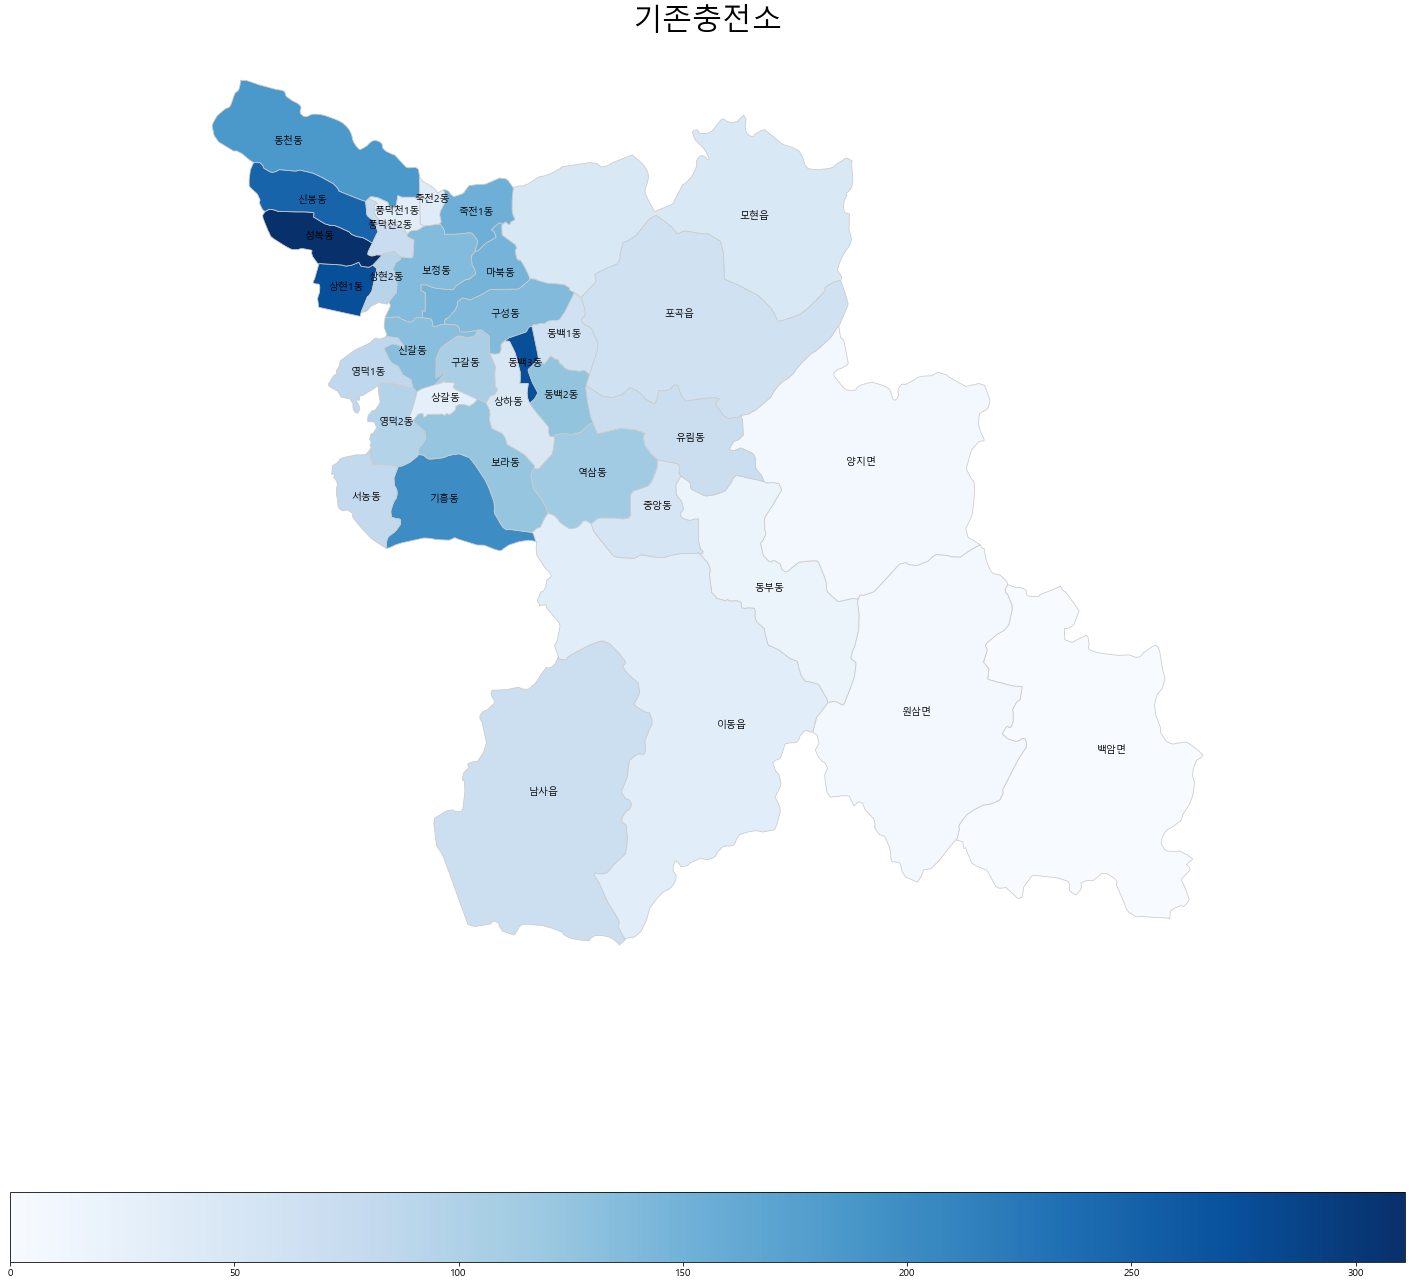

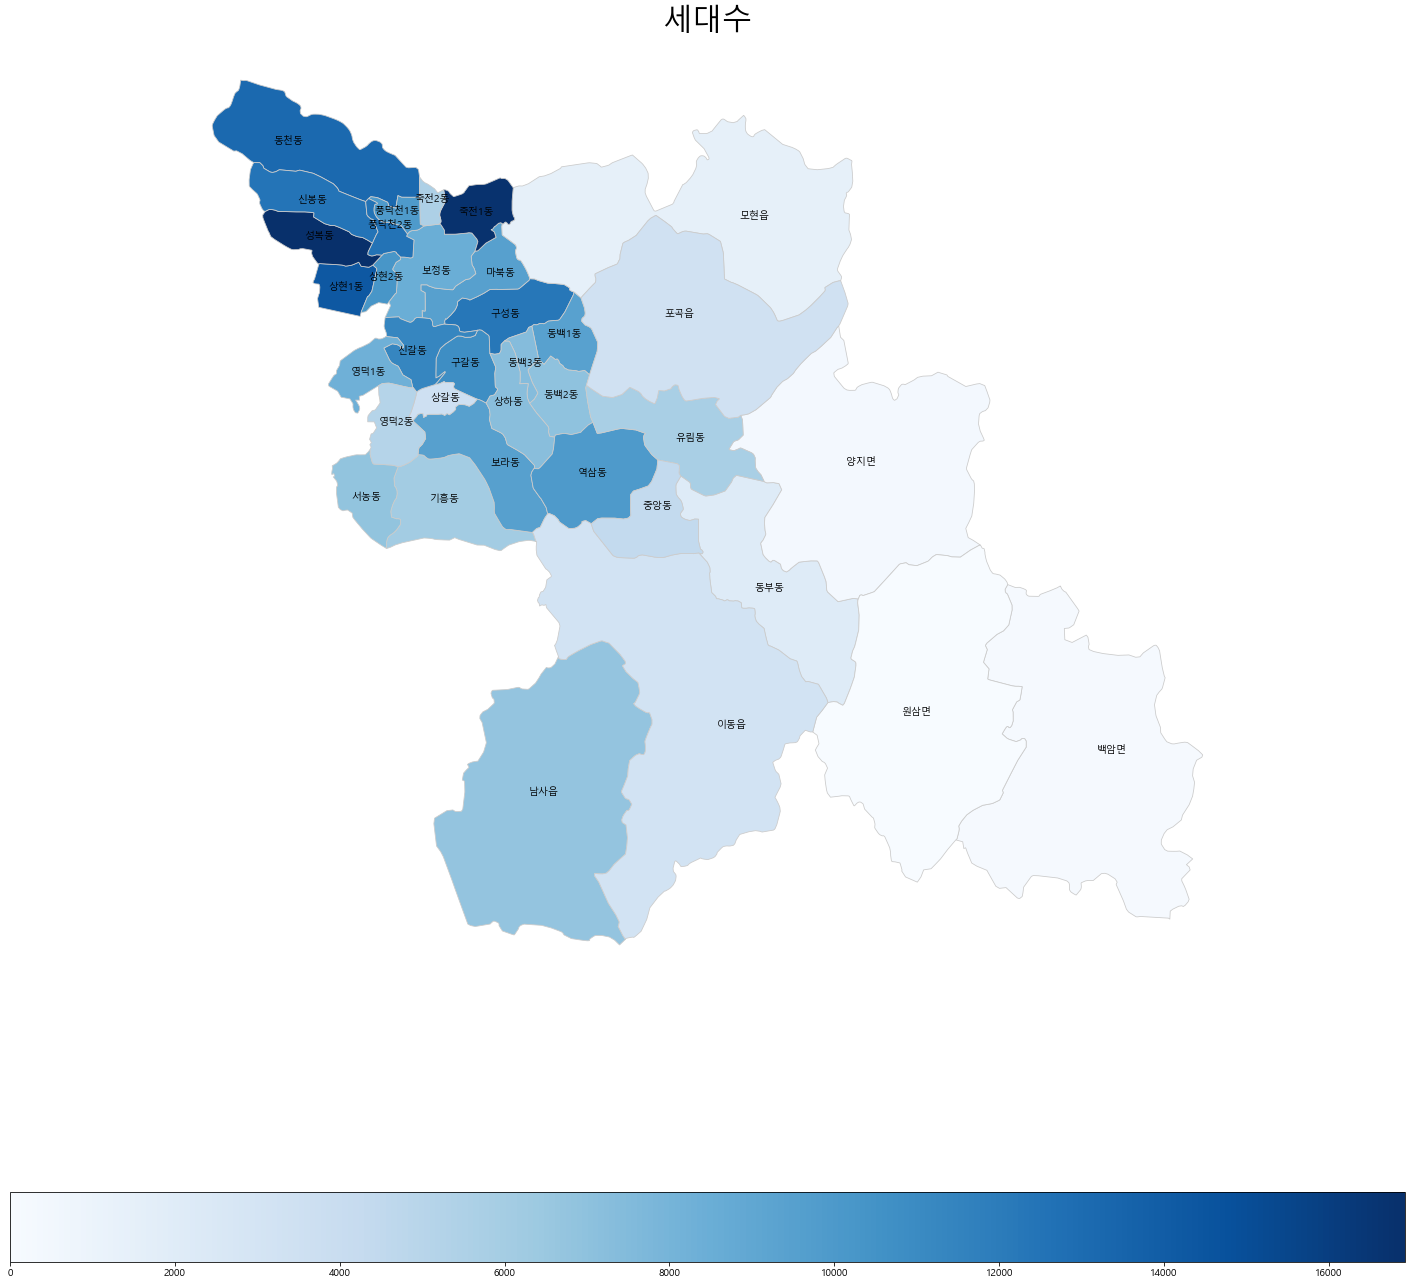

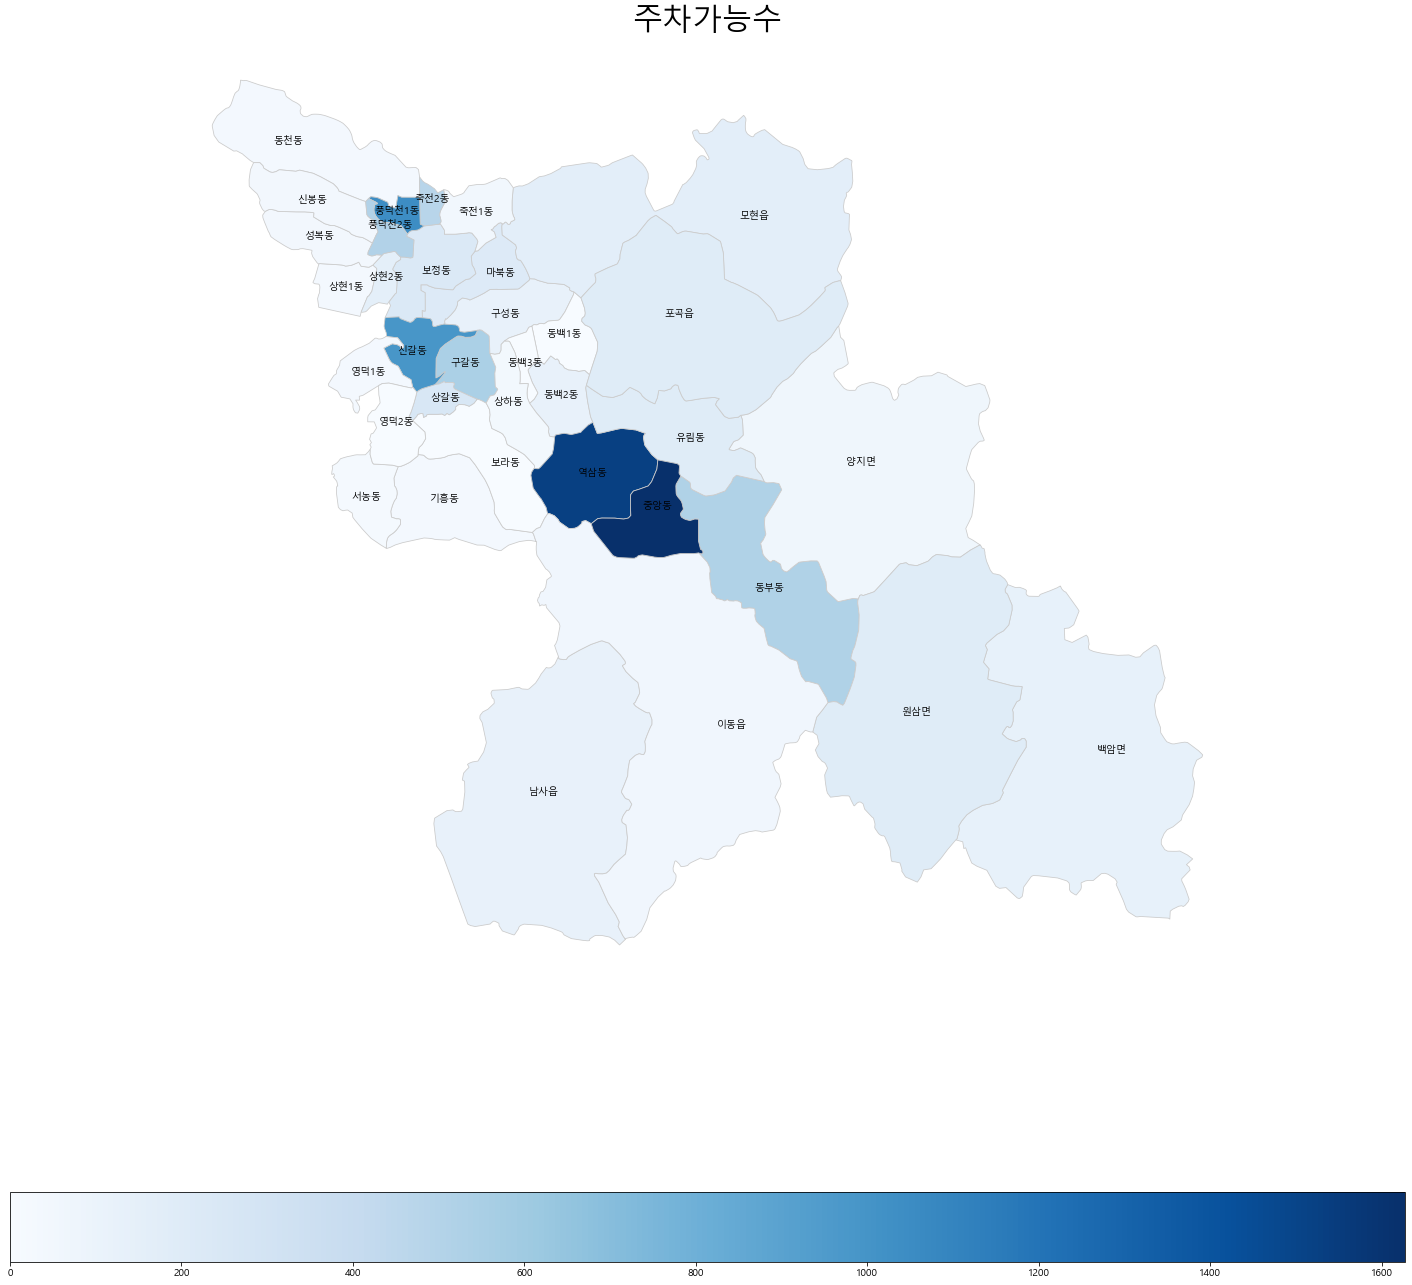

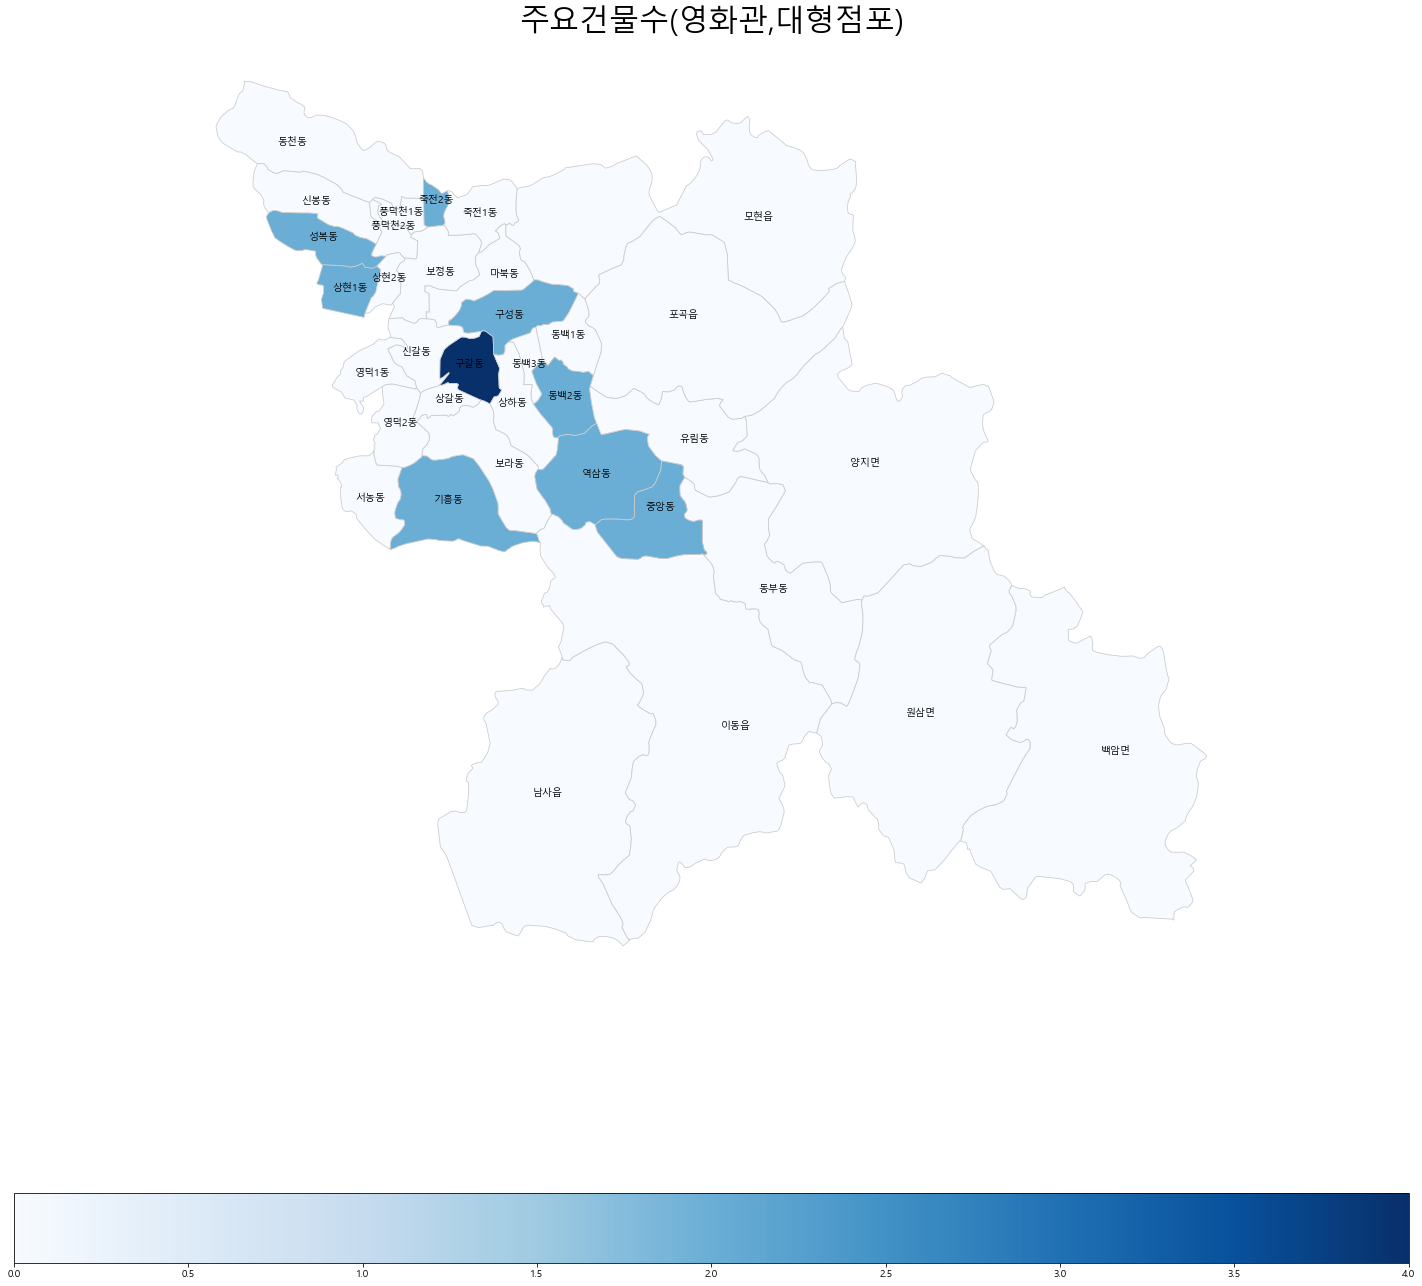

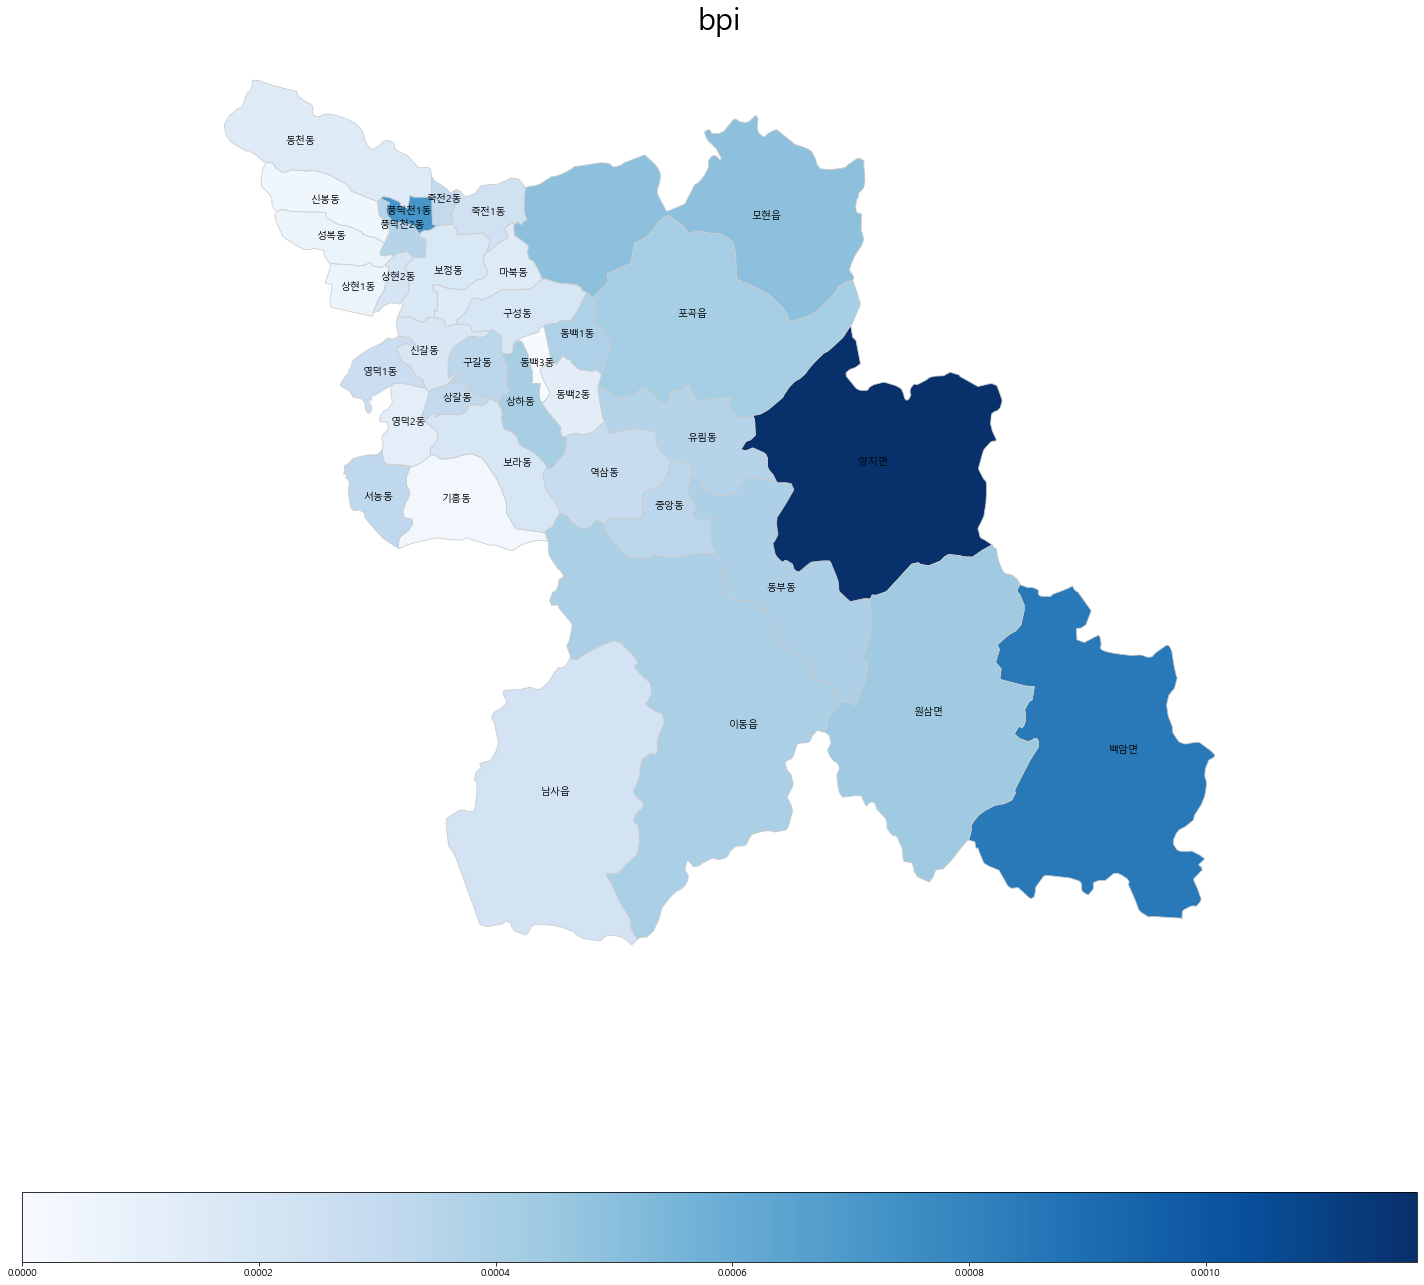

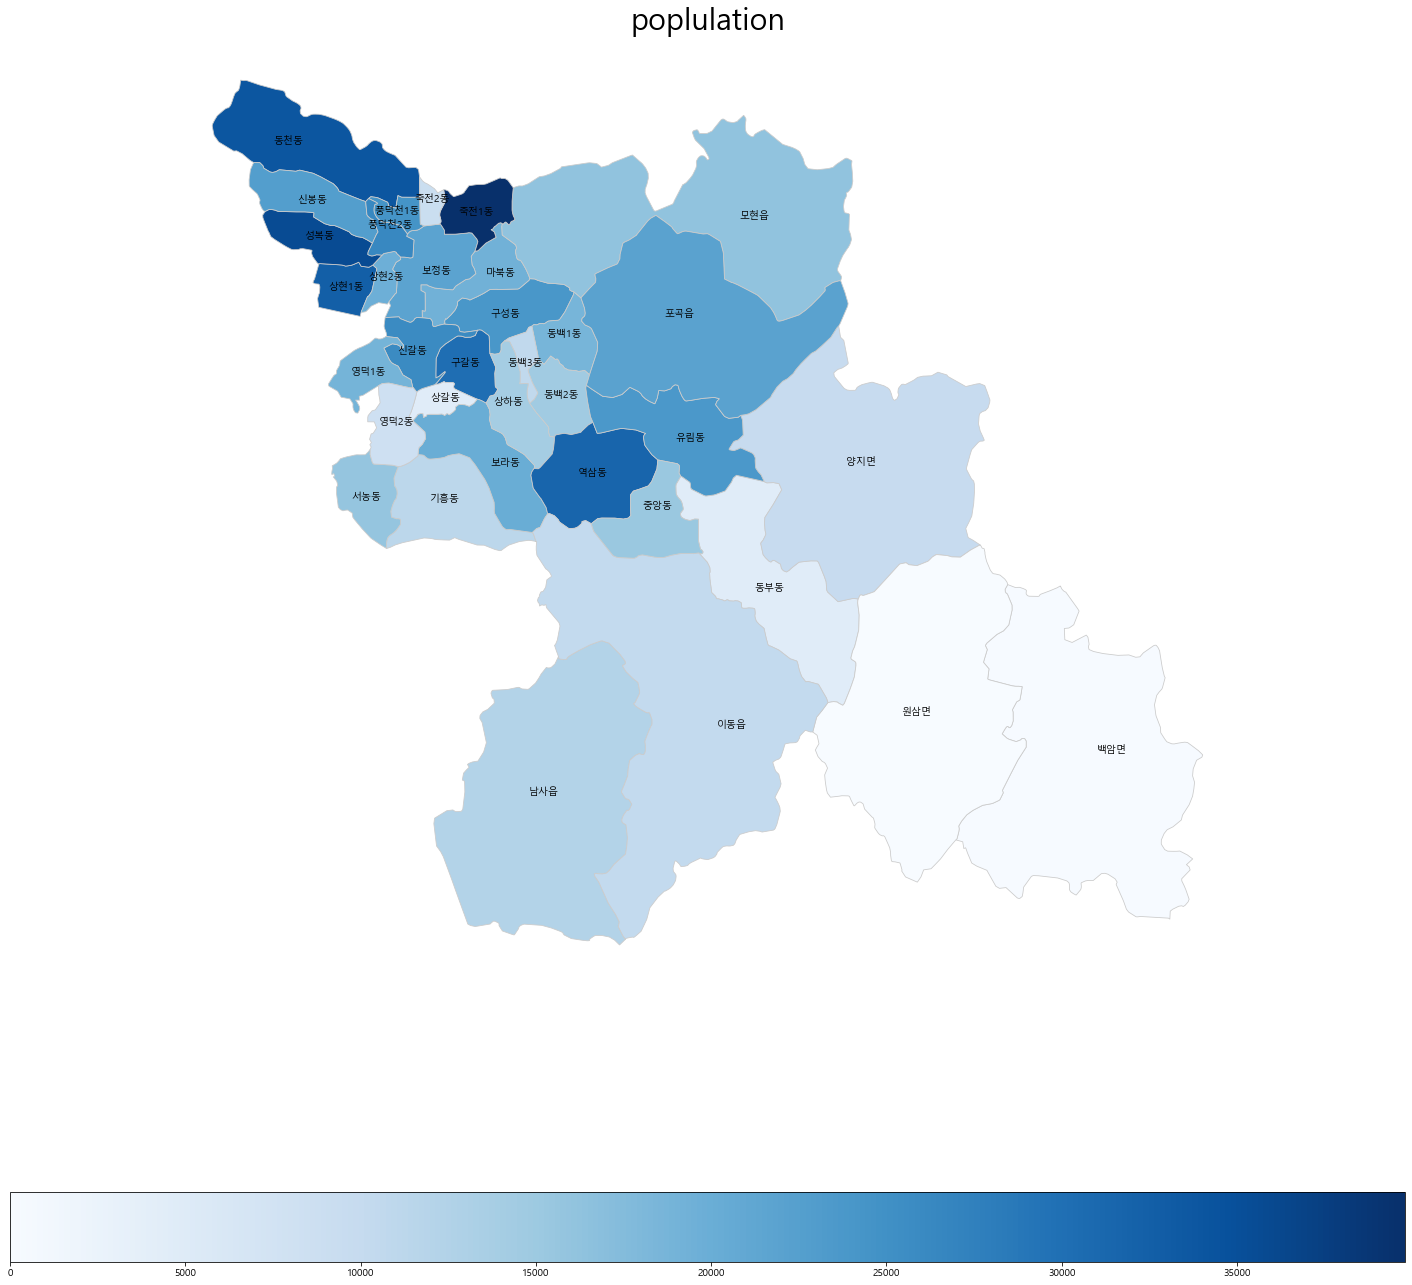

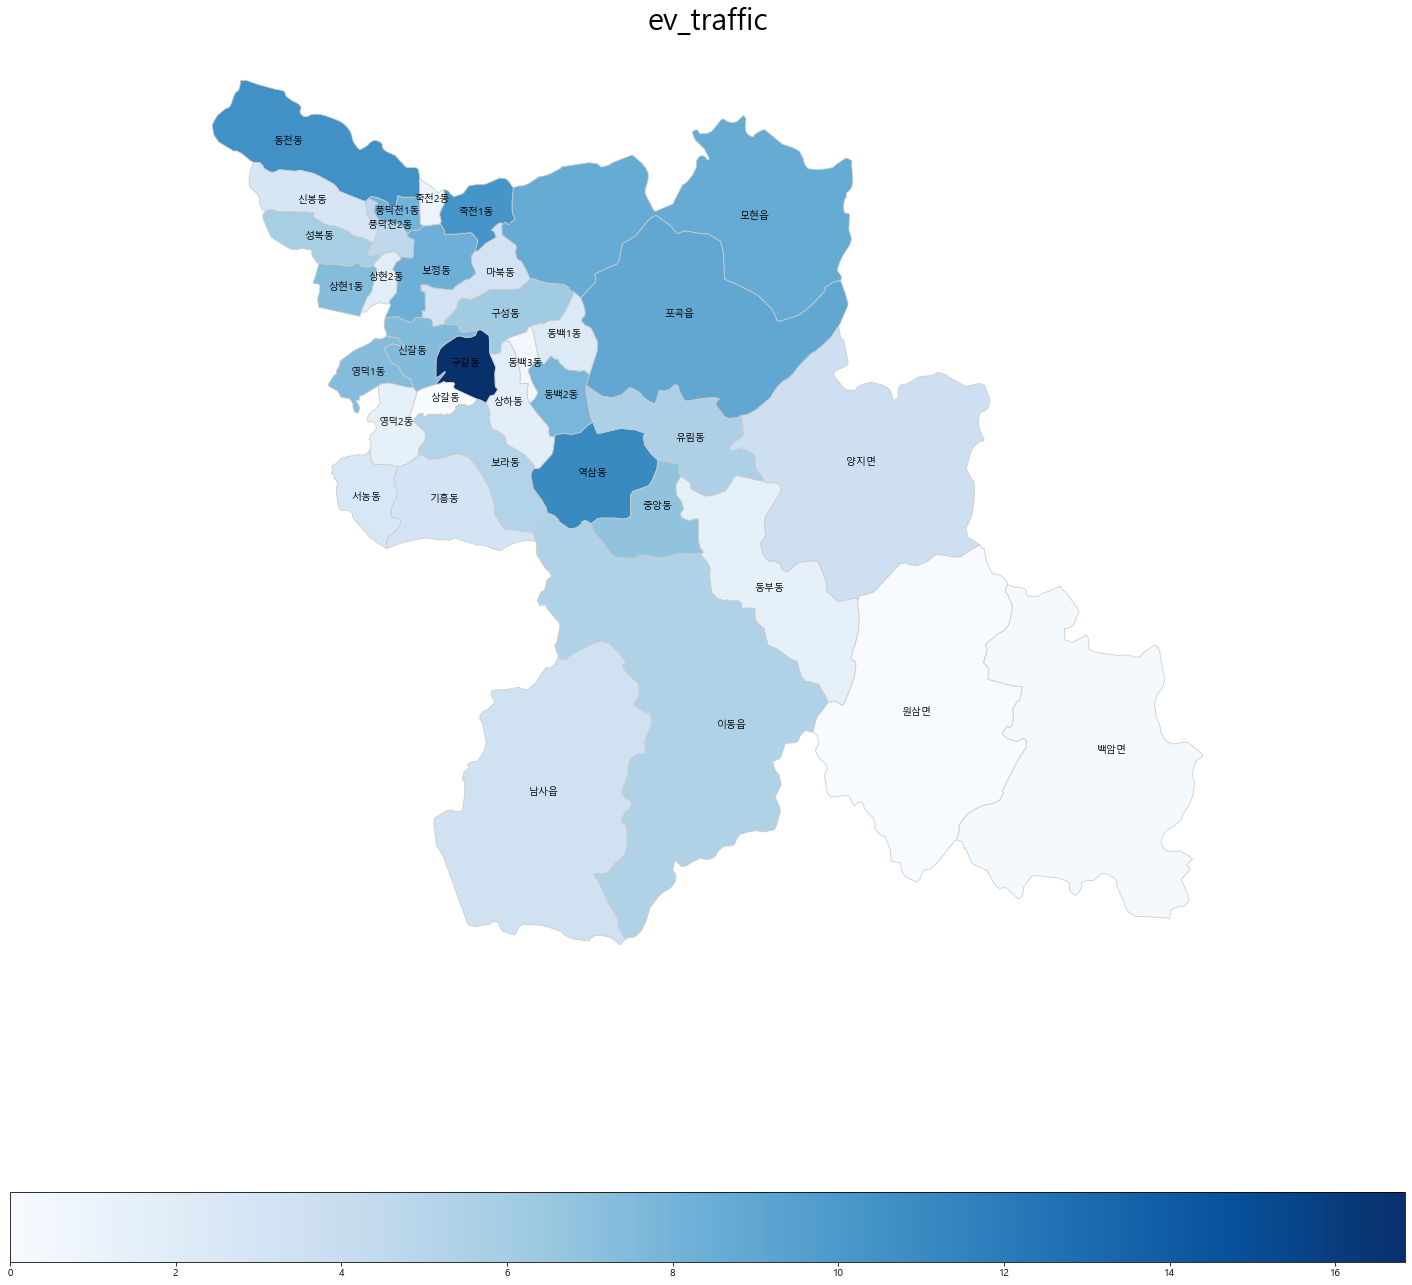

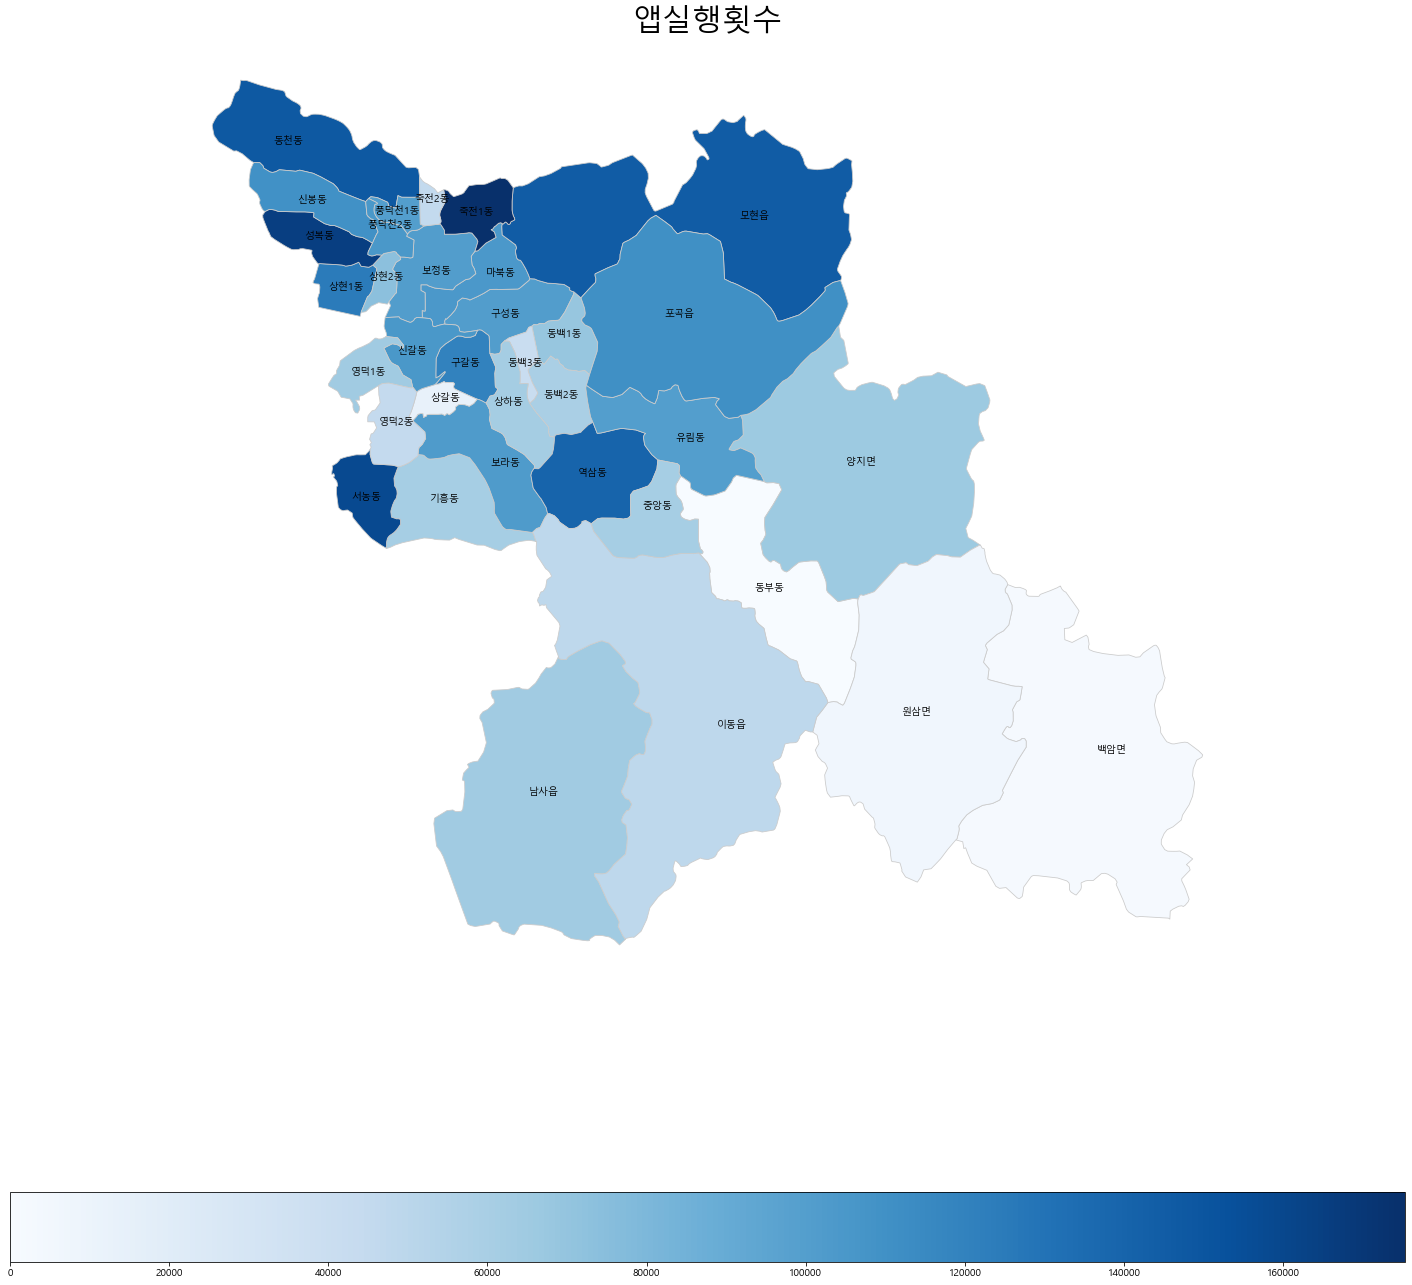

In [43]:
df_INNER_JOIN['coords'] = df_INNER_JOIN['geometry'].apply(lambda x: x.representative_point().coords[:])
df_INNER_JOIN['coords'] = [coords[0] for coords in df_INNER_JOIN['coords']]

for col, item in df_INNER_JOIN.iloc[:,1:10].iteritems():
    to_be_mapped = col
    vmin, vmax = 0,max(df_INNER_JOIN[col])
    fig, ax = plt.subplots(1, figsize=(25,25))

    df_INNER_JOIN.plot(column=to_be_mapped, cmap='Blues', linewidth=0.8, ax=ax, edgecolors='0.8')
    ax.set_title(col, fontdict={'fontsize':30})
    ax.set_axis_off()
    for idx, row in df_INNER_JOIN.iterrows():
        plt.annotate(text=row['adng_nm'], xy=row['coords'], horizontalalignment='center', color= 'k')
    
    sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
    sm._A = []
    cbar = fig.colorbar(sm, orientation='horizontal')

In [ ]:
df_INNER_JOIN['coords'] = df_INNER_JOIN['geometry'].apply(lambda x: x.representative_point().coords[:])
df_INNER_JOIN['coords'] = [coords[0] for coords in df_INNER_JOIN['coords']]

to_be_mapped = '앱실행횟수'
vmin, vmax = 0, max(df_INNER_JOIN['앱실행횟수'])
fig, ax = plt.subplots(1, figsize=(25,25))

df_INNER_JOIN.plot(column=to_be_mapped, cmap='Blues', linewidth=0.8, ax=ax, edgecolors='0.8')
ax.set_title('앱실행횟수', fontdict={'fontsize':30})
ax.set_axis_off()

for idx, row in df_INNER_JOIN.iterrows():
    plt.annotate(text=row['adng_nm'], xy=row['coords'], horizontalalignment='center', color= 'k')

sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []

cbar = fig.colorbar(sm, orientation='horizontal')

In [ ]:
df_INNER_JOIN['coords'] = df_INNER_JOIN['geometry'].apply(lambda x: x.representative_point().coords[:])
df_INNER_JOIN['coords'] = [coords[0] for coords in df_INNER_JOIN['coords']]

to_be_mapped = '기존충전소'
vmin, vmax = 0,max(df_INNER_JOIN['기존충전소'])
fig, ax = plt.subplots(1, figsize=(25,25))

df_INNER_JOIN.plot(column=to_be_mapped, cmap='Blues', linewidth=0.8, ax=ax, edgecolors='0.8')
ax.set_title('기존 충전소', fontdict={'fontsize':30})
ax.set_axis_off()

for idx, row in df_INNER_JOIN.iterrows():
    plt.annotate(text=row['adng_nm'], xy=row['coords'], horizontalalignment='center', color= 'k')

sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []

cbar = fig.colorbar(sm, orientation='horizontal')